# Errors, Correlations and Hypothesis Testing

Please ensure you have watched the Chapter 4 video(s).

## You will learn the following things in this Chapter

- How to combine (with weighting) measurements based on their errors.
- Covariance and correlation.
- Correlation statistics.
- How to interpret a correlation statistic.
- Classic hypothesis testing and confidence intervals.
- How to interpret a confidence interval.
- How to use Python programming to do the above.
- After completing this notebook you will be able to attempt CA 1 questions 2 and 3.

***

## Revision of Errors

If the measurement of a particular quantity is subject to many, independent and random errors, then the *central limit theorem* allows us to use the normal distribution to model the quantity’s errors.


Note that there are two types of errors:
- **statistical errors** - from random nature of measurement process, can be reduced by increasing the number of measurements and averaging over them.
- **systematic errors** - these arise from flawed measurements (eg a rogue voltmeter adding +2V to every measurement because its not properly calibrated). This is easy to spot as it remains even after repeating measurements multiple times.

### Combining measurements with different errors

Suppose we have two students, let's call them $A$ and $B$, who make a measurement of the length of our snake, $x$. Student $A$ finds the length to be $x = x_A \pm \sigma_A$, while student $B$ finds that $x = x_B \pm \sigma_B$. Given that both sets of data are valid estimates of the snake's length, we'd like to combine the results from the two experiments, to get a new, and hopefully improved result $x_{AB}$, with an associated uncertainty $\sigma_{AB}$.

How to proceed? It is tempting to simply average the two results, e.g. $x_{AB} = \dfrac{x_A + x_B}{2}$, but this feels a bit fishy if the two uncertainties $\sigma_A$ and $\sigma_B$ are not equal. Why should they have equal weighting, if one is less accurate (higher uncertainty) than the other? The answer is to weight the values according to their uncertainties, to produce a **weighted average**.

$\hat{x_0} = \dfrac{w_A x_A + w_B x_B} {w_A + w_B}$

where $\hat{x_0}$ denotes the weighted average, and $\hat{\sigma}_{x_0}$ is the standard deviation

$\hat{\sigma}_{x_0} = \dfrac{1}{\sqrt{\sum w_i}}.$

$w_i$ denotes the individual weights of each component in the average and $w_A = 1/\sigma_A^2$ and $w_B = 1/\sigma_B^2$.  

This type of weighting - also called optimal weighting - is extremely important in data analysis.  Optimal weighting allows you to take account of all data points, with each point contributing to the final result in a way than depends on how well you trust the data (i.e. the variance of the point). The problem is, that you need to know something about the error in each point (not always the case).

#### Derivation: weighted errors

We are going to assume once again that the errors in our measurements are normally distributed, and the two experiments performed by students $A$ and $B$ were completely independent. In that case, the probability that the students would obtain their results is given by,

$P_{x_0}(x_A) \propto \dfrac{1}{\sigma_A} e^{-\dfrac{(x_A -x_0)^2}{ 2\sigma_A}}$

for student $A$ and

$P_{x_0}(x_B) \propto \dfrac{1}{\sigma_B} e^{-\dfrac{(x_B -x_0)^2 }{2\sigma_B}}$

for student $B$. Note that the probabilities depend on the unknown, but true value of the measurement $x_0$.

So the probability that **both** students found the lengths $x_A$ and $x_B$ is then simply,

$P_{x_0}(x_A \cap x_B) = P_{x_0}(x_A , x_B)$

$= P_{x_0}(x_A) \times P_{x_0}(x_B) \propto \dfrac{1}{\sigma_A \sigma_B} e^{-\chi^2/2}$,


where we have introduced the notation $\chi^2$ (chi-squared) as a shorthand for,

$\chi^2 = \left( \dfrac{x_A - x_0}{\sigma_A} \right)^2 + \left( \dfrac{x_B- x_0}{\sigma_B} \right)^2$.

Using the principle of maximum likelihood from Chapter 3, we can see that $P_{x_0}(x_A , x_B)$ has a maximum when $\chi^2$ has a minimum. So we want to know the value of $x_0$ that would maximise the chances of $A$ finding $x_A$ $\bf and$ $B$ finding $x_B$. To do this, we need to differentiate $\chi^2$ and set the derivative equal to zero,

$2 \dfrac{x_A - x_0}{\sigma_A} + 2 \dfrac{x_B- x_0}{\sigma_B} = 0$

The solution for $x_0$ is then simply,

$\mbox{best estimate for~} x_0 = \left( \dfrac{x_A}{\sigma_A^2} + \dfrac{x_B}{\sigma_B^2}  \right) \Big/ \left( \dfrac{1}{\sigma_A^2} + \dfrac{1}{\sigma_B^2}  \right)$

If we define weights to have the form $w_A = \dfrac{1}{\sigma_A}^2$ and $w_B = \dfrac{1}{\sigma_B}^2$, then we can tidy this up to obtain,

$\hat{x_0} = \dfrac{w_A x_A + w_B x_B} {w_A + w_B}$

where $\hat{x_0}$ denotes the weighted average.

## Covariance

During lab experiments, you will have learnt how to identify sources of error in your experiments, and how to propagate these errors through to the final result. 

We will briefly discuss the maths underlying the error propagation here, since it provides the background for an important property in statistics: the covariance. Let's first assume that we have a function $f$ that is dependent on some measured quantity $x$, and yields a value $y$ that we are interested in knowing, such that $y = f(x)$. Now the measurements of $x$ are associated with some random error, $\sigma_x$, and so the final value of $y$ will also have an error $\sigma_y$. How do we calculate $\sigma_y$?

Assuming the errors in $x$ are small, and are close to the true value $\hat{x}$, we can expand $f(x)$ around the point $\hat x$ and derive an expression for $y - \hat y$ which leads to:

$\sigma_y^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \, \sigma_x^2$,

For two variables eg $z = f(x,y)$, we get the following: 

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$

Ignoring the last term on the RHS for a moment, we see that the expression is the normal error propagation formula that you may have seen during your lab work (for independent errors). If  $\sigma_x$ and $\sigma_y$ are not independent, then we need the last term! This is called the *covariance*.

$\sigma_{xy} = \dfrac{1}{N}\sum (x - \hat x) (y - \hat y).$

In fact, this is called the population covariance.

The variance of a variable describes how much the values are spread. The covariance instead is a measure that tells the amount of dependency between two variables. A positive covariance means that the values of the first variable are large when the values of the second variables are also large. A negative covariance means the opposite: large values from one variable are associated with small values of the other. For truly independent variables $\sigma_{xy}$ will be zero.

We know from Chapter 3 that our experiments are *sampling* from the underlying true population, so we need to define a sample covariance:

$\sigma_{xy} = \dfrac{1}{N-1}\sum (x - \hat x) (y - \hat y).$

Sometimes it can be difficult to conclude where two sources of error (or two parameters) are indeed correlated – often this is the case when the number of data points is small. So what then? If we assume the errors are independent, can we find a way to get the upper limit on the error, to ensure that we don’t miss anything?

Yes, we can use the **Schwarz inequality** to write $|\sigma_{xy}| \le \sigma_x \sigma_y$ and therefore

$\sigma_z \le |\dfrac{\partial f}{\partial x}|\sigma_x + |\dfrac{\partial f}{\partial y}|\sigma_y$.

### Problems with covariance

Covariance keeps the scale of the variables $x$ and $y$, and therefore can take on any value. This makes interpretation difficult and comparing covariances to each other impossible. For example, $\sigma_{XY}  = 5.2$ and $\sigma_{ZQ}= 3.1$ tell us that these pairs are positively associated, but it is difficult to tell whether the relationship between $X$ and $Y$ is stronger than $Z$ and $Q$ without looking at the means and distributions of these variables.  We can normalise the covariance to give us both direction and strength of the correlation between these parameters. 

#### Derivation error equation and covariance

Let's first assume that we have a function $f$ that is dependent on some measured quantity $x$, and yields a value $y$ that we are interested in knowing, such that $y = f(x)$. Now the measurements of $x$ are associated with some random error, $\sigma_x$, and so the final value of $y$ will also have an error $\sigma_y$. How do we calculate $\sigma_y$?

Assuming the errors in $x$ are small, and are close to the true value $\hat{x}$, we can expand $f(x)$ around the point $\hat x$,

$f(x) = f(\hat x) + (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}  + \dotsb$

If we now identify $\hat y = f(\hat x)$, then we can see that,

$y - \hat y = f(x) -  f(\hat x) \approx  (x - \hat x) \left( \dfrac{df} {dx} \right)_{\hat x}.$

which gives us an expression for how the value of $y$ derived from our measured value of $x$, relates to the true values of both $y$ and $x$, which are given by $\hat y$ and $\hat x$. If we then take many measurements of $x$, we can use the expression above to write the standard deviation about the mean, as

$\dfrac {1}{N}\sum_i^N (y_i - \hat y)^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \dfrac {1}{N}\sum_i^N (x_i - \hat x)^2$

or simply,

$\sigma_y^2 = \left( \dfrac{df} {dx} \right)^2_{\hat x} \, \sigma_x^2$.

For two variables $x$ and $y$ where $z = f(x,y)$, we expand our function $f$ around the true values of $\hat x$ and $\hat y$ using Taylor's expansion, to get,

$\hat{z} = ~\hat{f}(x, y) =  f(\hat x, \hat y) + \left( \dfrac{\partial f} {\partial x} \right)_{\hat x} (x - \hat x) + \left( \dfrac{\partial f} {\partial y} \right)_{\hat y} (y - \hat y) + \dotsb$

Now write the bracket term in the variance for z:
 
$(z - \hat z)^2 = ~( f(x, y) - f(\hat x, \hat y) )^2$

$ (z - \hat z)^ \approx \left( \dfrac{\partial f} {\partial x} \right)^2 (x - \hat x)^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 (y - \hat y)^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y}  (x - \hat x) (y - \hat y),
$

which then gives us the result that,

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$

$\sigma_z^2 = \left( \dfrac{\partial f} {\partial x} \right)^2 \sigma_x^2 + \left( \dfrac{\partial f} {\partial y} \right)^2 \sigma_y^2 + 2 \dfrac{\partial f} {\partial x} \dfrac{\partial f} {\partial y} \sigma_{xy}.$

***

## Correlation

So how do we measure the degree of correlation (the association between the observed values of two variables) in data?  In almost any business, or modelling that happens, it is useful to express one quantity in terms of its relationship with others. For example, sales might increase when the marketing department spends more on TV advertisements.  Often, correlation is the first step to understanding relationships between variables and subsequently building better business and statistical models.

Two variables may have a positive association, so that as the values for one variable increase, so do the values of the other variable. Alternatively, the association could be negative or neutral. Correlation quantifies this association, often as a measure between the values -1 to 1 for perfectly negatively correlated and perfectly positively correlated. The calculated correlation is referred to as the “correlation coefficient.” This correlation coefficient can then be interpreted to describe the measures.

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/correlation.png" width="700">

For a linear function, the extent to which data points $(x_1, y_1)... (x_N, y_N)$ support a linear correlation is given by the *linear correlation coefficient* sometimes called the Pearson correlation coefficient,

$r =  \dfrac{\sigma_{xy}} {\sigma_x\,\sigma_y}$

$ r = \dfrac{\sum(x - \hat x)(y - \hat y)} { \sqrt{\sum (x - \hat x)^2 \sum ( y- \hat y)^2} }.
$

If $r$ is close to $\pm 1$, then we would say that the points are correlated.  Completetly uncorrelated points would have $r=0$. An illustration of this is seen in the image below:

So, why is correlation a useful metric?

- Correlation can help in predicting one quantity from another.
- Correlation can (but often does not) indicate the presence of a causal relationship.
- Correlation is used as a basic quantity and foundation for many other modeling techniques.

### <font color=#4290C4>Example</font>

Why does Pearson $r$ correlation equal to $\pm 1$ give us the strength of the correlation?

###  <font color=#c38241> Solution</font>

Click below to see the solution.

From the Schwarz inequality $|\sigma_{x,y}| \le \sigma_x\sigma_y$.

Now imagine that all the points do indeed lie exactly on a straight line $y = A+Bx$. Since $y_i = A + Bx_i$ and $\hat y = A + B\hat x$, then $y_i - \hat y = B(x_i - \hat x)$. Using this to remove the $y$s, we get,

$r  = \dfrac{B \sum(x_i - \hat x)^2} { \sqrt{\sum (x_i - \hat x)^2 B^2 \sum (x - \hat x)^2} } = \dfrac{B}{|B|} = \pm 1.$

However in the case that there's no correlation with $x$ and $y$, then although the numerator will fluctuate $+/-$ve, the dominator will always be positive and drive $r$ to zero as the number of points tend to infinity.

### Correlation with Probabilities

So how close to 1 is close enough?  It turns out it is actually possible to work out the probability that $r$ will exceed a given value $r_0$ after a given number of uncorrelated data points are considered, i.e. $P_N(|r| \geq r_0)$. 

If we look at standard probability tables (see table below), the probability of randomly finding a correlation between two variables with coefficient of $r \ge 0.7$ for a sample of $N=3$ is 51% **even if 2 variables are uncorrelated**.  Therefore we need to combine any $r$ correlation value with some measure of the probability of getting that value just by random given the number of data points you have.  We will return to this in Chapter 5.

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/ro.png" width="700">

Note that the correlation between two variables that each have a Gaussian distribution can be calculated using standard methods such as the Pearson's correlation but this procedure cannot be used for data that does not have a Gaussian distribution. Instead, we will see something at later which can allow us to look for correlations without assuming a Gaussian distribution.

### <font color=#4290C4>Example</font>

Generate some fake data using the following 


`data1 = 20 * np.random.normal(0,1,1000) + 100`

`data2 = data1 + (10 *np.random.normal(0,1,1000) + 50)`

Find the covariance of this dataset and the Pearson $r$ correlation and comment on what you find.

The `random.normal(0,1,N)` generates data with normal distribution centred on 0, with width 1 and $N$ data points.

###  <font color=#c38241> Solution</font>

Click below to see the Solution.

the mean of x is 99.86
the mean of y is 149.72
the covariance between x and y is 408.81


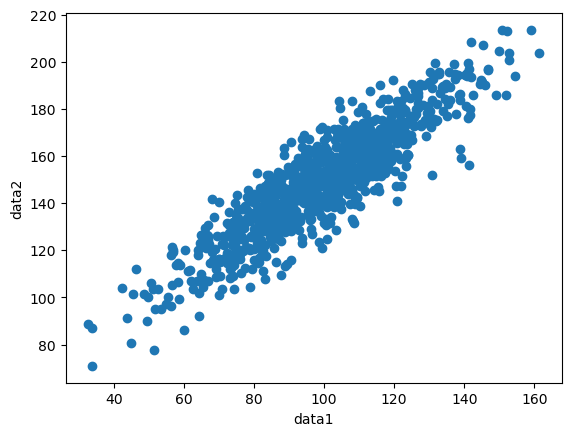

In [1]:
import numpy as np
import pylab as plt

# the line below makes the plot appear in the jupyter notebook
%matplotlib inline  

# let's generate some random data
data1 = 20 * np.random.normal(0,1,1000) + 100
data2 = data1 + (10 *np.random.normal(0,1,1000) + 50)
n = len(data1)

# define a function that estimates covariance
def cov(x,y,n):
    x_hat = np.mean(x)
    y_hat = np.mean(y)
    return np.sum((x-x_hat)*(y-y_hat))/(n-1)

# let's work out mean of the data
xhat = np.mean(data1)
yhat = np.mean(data2)

print('the mean of x is {:.2f}'.format(xhat))
print('the mean of y is {:.2f}'.format(yhat))

# covariance between the datasets
covar = cov(data1,data2,n)
print('the covariance between x and y is {:.2f}'.format(covar))

# plot
plt.scatter(data1, data2)
plt.xlabel('data1')
plt.ylabel('data2')
plt.show()

The data looks to be highly correlated. Now it's not too much more work to calculate the linear correlation coefficient $r$. Here we will see how to do this using the inbuilt python function from the `scip.stats` package. Many of the things we'll do in the course have inbuilt routines in python but part of the coursework will see you doing it from scratch to check understanding.

In [2]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation is: %.3f' % corr)

Pearsons correlation is: 0.895


We know from our notes that this value of $r$ indicates that the data is strongly correlated. 

***

## Null hypothesis Tests

Testing a hypothesis is one of the foundations of data analysis. Examples include: does this drug make people better? Is the die fair? Are an observed population of low-mass galaxies consistent with the predictions from $\Lambda$CDM? Did CERN really detect the Higg's Boson? We'll start this section by outlining the formal ideas behind hypothesis testing, and then look at some classic examples.

The most common form of hypothesis testing is  involves trying to find the unknown parameter $\theta$ that is part of a model $f(\theta)$. Now you might have a best guess for the unknown parameter, and an associated uncertainty, so really we're not always testing if $\theta$ is an exact value, but more generally whether $\theta \in \Theta$, that is $\theta$ is part of some set of possible values $\Theta$. From our best guess of $\theta$, what we're trying to determine is whether $\theta \in \Theta_0$ or $\theta \in \Theta_1$, and where,

$\Theta_0 \cup \Theta_1 = \Theta$ and $\Theta_0 \cap \Theta_1 = 0$.

We then make a set of new observations of some outcome of the model $X = \{x_1, x_2, x_3, \ldots\}$, and we want to test whether they support the idea that, say, $\theta \in \Theta_1$. We also know the probability of the model predicting the data, which is given by $p(X, \theta)$.

This is **Null Hypothesis Significance Testing**, which we will abbreviate as NHST.  

\begin{align}
H_0 &:&~\theta \in \Theta_0 &~~ \text{the null hypothesis} \\
H_1 &:&~\theta \in \Theta_1 &~~ \text{the alternative hypothesis}
\end{align}

The null hypothesis assumes that nothing interesting happens/happened. The alternative hypothesis is where the action is i.e. some observation/ phenomenon is real (i.e. not a fluke) and statistical analysis will give us more insights on that.  The null hypothesis is saying that one variable does not affect the other and anything we see in our results are due to chance and are not significant in terms of supporting the idea being investigated. Thus, the null hypothesis assumes that whatever you are trying to prove did not happen.

We then compute a statistic and then ask "What is the chance of observing the test-statistic for this sample (considering its size and the probability governing the system), purely randomly (ie if the null hypothesis were true)?"

This chance — the probability value of observing the test-statistic — is the so-called $p-$value. The $p-$value is the probability of getting a value of the test statistic at least as extreme as that
actually observed value purely by chance, if the null hypothesis is true.

- $p < 0.05$: A $p$-value less than 0.05 for your result is considered by some scientists as statistically significant. It indicates strong evidence against the null hypothesis because what we're saying is that there less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

- $p > 0.05$: A $p$-value higher than 0.05 is not statistically significant and indicates strong evidence for the null hypothesis. In this case we would keep the null hypothesis and reject the alternative hypothesis. Note that we **cannot accept the null hypothesis**, we can only reject the null or fail to reject it. 

As an example, if a test gives the p-value, $p = 0.03$, the null hypothesis would be rejected at significance level ($\alpha$) where $\alpha= 0.05$, but not at the more conservative significance level of $\alpha = 0.01$. Below is a schematic showing this idea:

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/pvalue.png" width="700">

So the kind of statistical statement you may read is something like the following, "Feeding chocolate to female chickens gives a proportion of male chicks that is significantly less than 50% (with $p=0.001$)."

**But beware:**
- having a $p$-value below 0.05 does not mean that there is a 95% probability that the research hypothesis is true. 
- Stating a low $p$ value does not prove our research idea is correct because this would imply we have 100% certainty which is impossible.
- we would instead comment that our results provide support for a research theory.

### Errors in NHST

It is possible to make two types of error in classical hypothesis testing when you reject a null hypothesis, and they have well defined names:

 - Type I error is when you (for some reason) reject $H_0$ when it is true (eg experimental results are affected by randomness) - this results in a false positive.
 - Type II error is when you decide not to reject $H_0$ when it is false. 

**For the typical $\alpha=0.05$ or equivalently 5%, 1 experiment in every 20 will yield incorrect conclusions.**

Remember, you cannot prove that something is correct in classical hypothesis testing, only prove that it is wrong. This is why the errors focus on $H_0$ - at best you can accept that $H_0$ is correct, and thus our hypothesis that  $\theta \in \Theta_1$ is wrong.

***

## Confidence Intervals

The $p$-value above gives the difference from a previously specified statistical level $\alpha$ (say probability of 0.05).  In contrast, a confidence interval (CI) contains a parameter (like a population mean) with a certain confidence level. In other words, the CI provides a range of possible plausible values for the target population, as well as the probability with which this range covers the real value.

Often data analysts use a confidence interval of 95% to quote their numbers. A statement that you may see is ”Feeding chocolate to female chickens produced 36.1% male chicks with a 95% confidence interval of 25.9 to 47.4%."

For example, your mean battery life might be 105 hours, and the 95% confidence interval in that number ranges from 100 to 110 hours. That means if you repeat your experiment millions of times, 95% of the time you repeat your experiment, the average battery life will fall into that range and the other 5% it will not.  Take a look at the figure below to see this illustrated (taken from [here](https://www.simplypsychology.org/confidence-interval.html)).

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/confidence.png" width="700">

What this is really telling us is that of the many 95% confidence intervals produced from multiple experiments in order to try and measure a variable, 95% are expected to contain the true value. The other 5% of experiments may completely fail!   This is a bit awkward! See the image below (taken from Claus O. Wilke's Fundamentals of Data Visualisation book [here](https://clauswilke.com/dataviz/visualizing-uncertainty.html)) for an illustration of this for a confidence interval of 68% (ie for this variable, the confidence interval includes the true mean approximately 68% of the time - green and does not contain the true mean 32% of the time -orange).

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/ci_out.png" width="700">

Check out the incredible animation of confidence intervals [here](https://rpsychologist.com/d3/ci/).

Comparing with our normal distribution error function from Chapter 3, we can see that a probability of 0.954 equates to a value that is $\pm 2\sigma$ from the mean value (to be exact it is $\pm 1.96\sigma$. As such we can also quote a 95% confidence interval as $\mbox{mean} \pm 1.96\sigma$, or a 99.7% confidence interval as $\mbox{mean} \pm 3\sigma$.

Tips:
- The narrower the confidence interval (upper and lower values), the more precise is our estimate.
- The confidence interval on your sample statistic should become more narrow as you make more measurements $N \to \infty$ as you approach your population value.
- If we want a confidence interval of say 99%, then our confidence interval increases.

Below we show a figure (again by Claus Wilke) that illustrates the relation between a sample of data, the sample mean, standard deviation, standard error, and confidence intervals, in an example of chocolate bar ratings. This figure is from [this blog](https://clauswilke.com/dataviz/visualizing-uncertainty.html) and is a sample of results of ratings from experts tasting 125 chocolate bars from Canadian chocolate makers.  The scale 1 to 5 represents unpleasant to luxury. The large orange dot is the mean of the ratings.  Data source: Brady Brelinski, Manhattan Chocolate Society.

<img src="https://github.com/haleygomez/Data-Analysis-2024/raw/master/blended_exercises/Chapter4/choc.png" width="700">

### <font color=#4290C4>Example</font>

A poll given by the New York Times indicates that, in the next election, 34% of surveyed voters said they would vote for Biden and 31% said they would vote for Trump (with $\pm$ 3% margin of error). Note that polls typically use the default 95% confidence level.  What does this mean?

###  <font color=#c38241> Solution</font>

Click below to see the Solution.

This means that, based on the voters sampled, there is a 95% chance that candidate Biden has the support of anywhere between 31% and 37% of all voters, while there is a 95% chance that candidate Trump has the support of anywhere between 28% and 34% of all voters. Clearly, both intervals overlap, which make it difficult to conclude with certainty that Biden would really be ahead of Trump, if we were to ask the question to the entire population of voters.

### <font color=#4290C4>Example</font>

Fox news discusses a publication where a 95% confidence interval for the average amount of television watched by Americans was found to be (2.69, 6.04) hours.  They state that this means that 95% of all Americans
watch between 2.69 and 6.04 hours of television. Is this statement factual?

###  <font color=#c38241> Solution</font>

Click below to see the Solution.

This statement by Fox news is false. The correct statement would be that we are 95% confident that the average amount of television watched by Americans is between 2.69 and 6.04 hours.

***

### Bayesian vs Frequentist Approaches

**Frequentist Approach**

- How likely is the data given the model?

- A probability is a measure of the frequency of repeated events, so the interpretation is that parameters are fixed (but unknown), and data are random.

- Probability Density Functions *quantify variability in a sequence of trials* such that $p(x)$ describes how the values of $x$ would be distributed among infinite trials $N$.

- The confidence interval either contains the population mean or it does not, frequentists are 95% confident that the true value of the mean is contained in the quoted confidence interval as $N$ gets large.

- This confidence interval is not a statement of the *sample, but rather the population*, 5% of confidence intervals won’t contain the mean!

**Bayesian Approach**

- How likely is the model given the data?

- A probability is a measure of the degree of certainty about values, so the interpretation is that parameters are random and data are fixed.

- PDFs *quantify uncertainty in estimating the data* such that $p(x)$ describe how the probability is distributed over possible values of $x$ that might have been measured in a single trial.

- Bayesians use credible intervals instead of confidence intervals (see Chapter 6) to ask “where do we expect the true parameter value to lie?”

***

Now you are ready to tackle the **Chapter 4 quiz** on Learning Central and the [Chapter 4 yourturn notebook](https://github.com/haleygomez/Data-Analysis-2024/blob/master/blended_exercises/Chapter4/Chapter4_yourturn.ipynb).